In [2]:

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
customer_data=pd.read_csv('/content/drive/MyDrive/Prodigy ML/Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
x=customer_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

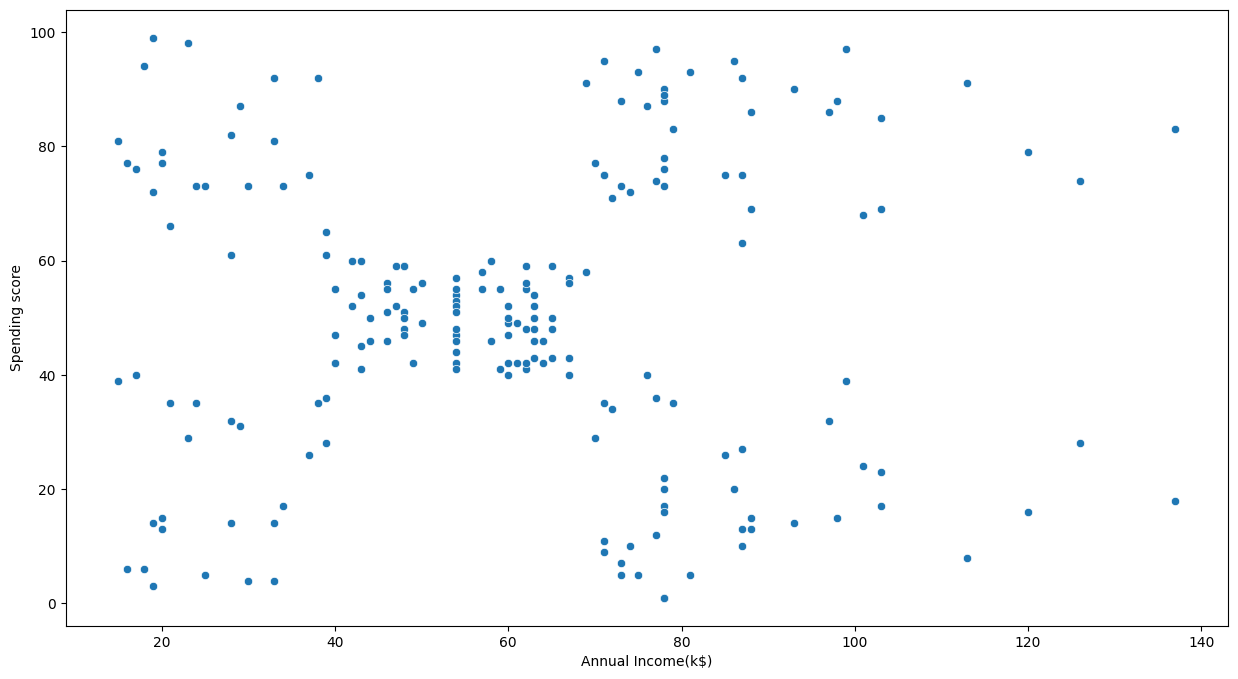

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=x[:,0], y=x[:,1])
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score')
plt.show()

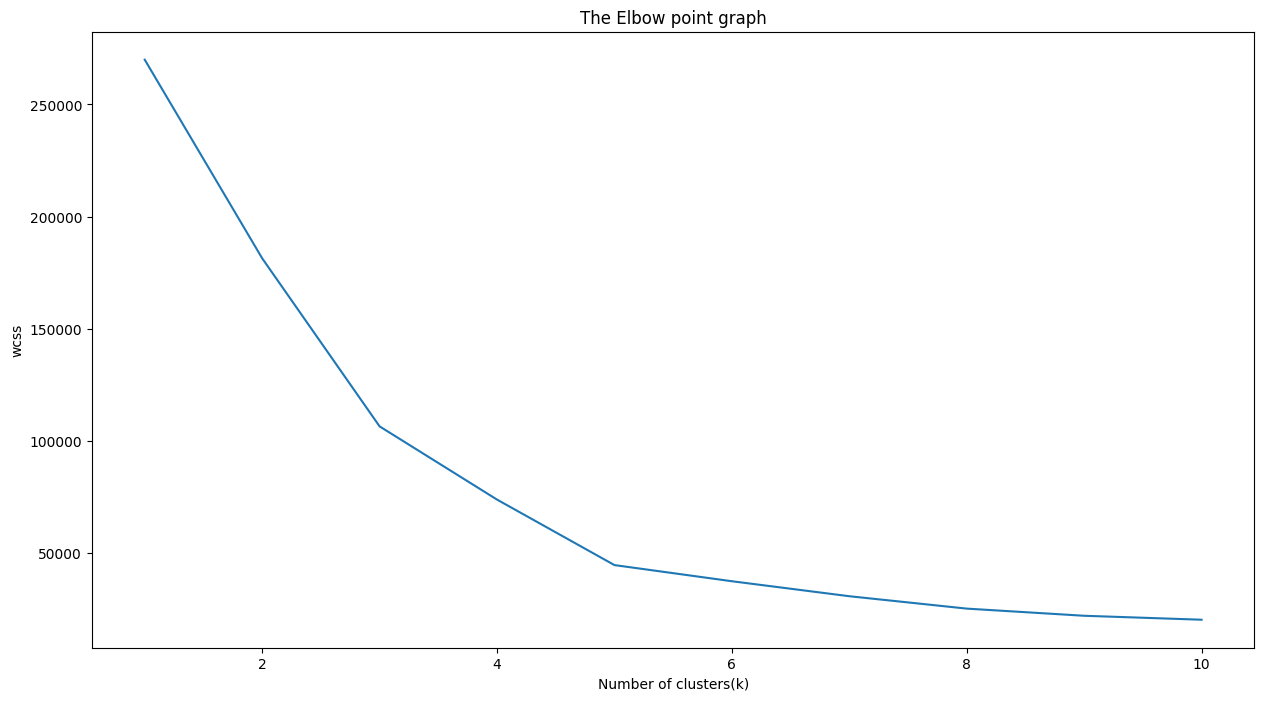

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow point graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)


In [13]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

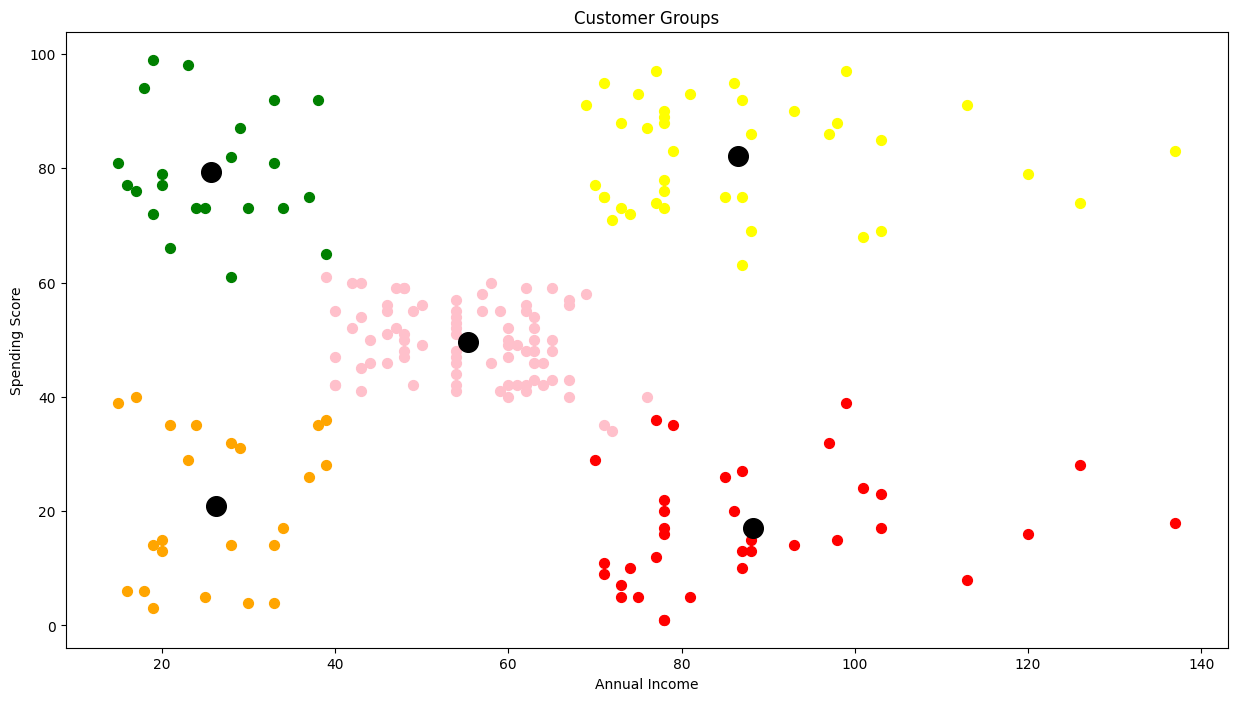

In [14]:
plt.figure(figsize=(15,8))
plt.scatter(x[y==0,0],x[y==0,1], s = 50, c='red', label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s = 50, c='pink', label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s = 50, c='yellow', label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1], s = 50, c='green', label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1], s = 50, c='orange', label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='clusters')

plt.title('Customer Groups')

plt.xlabel('Annual Income')

plt.ylabel('Spending Score')

plt.show()